In [1]:
/*************************************************

Analysis of dilepton final state from 13TeV dataset

*************************************************/

#include <iostream>
#include <fstream>
#include <algorithm>

Structure of OpenData (13TeV):
- Data is stored in nTuples, i.e. 'trees'
- One event = one entry in the tree
- One variable = one 'branch' in the tree (branch = integers/floats/vectors/booleans etc.)
- All events have the same branches


TChain is used in order to link together data from several nTuples, i.e. it is a 'chain of trees'.
Would typically like one chain for real data and one for MC (background).

In [2]:
/*

1. Reading the dataset

*/

TChain *background = new TChain("mini");
TChain *data = new TChain("mini");

TChain *background_testing = new TChain("mini");

In [3]:
TString sample; 
TString path; 
TString type;
vector<Int_t> dataset_IDs;
vector<TString> types;
Int_t DSID;

In [4]:
ifstream infile1("../Input/13TeV/dataset_MCInput.txt");

string name ;

In [5]:
infile1.clear();
infile1.seekg(0, ios::beg);  // Start at the beginning of the file

background->Reset(); // Reset the TChain (if necessary)
DSID = 0;

//while (!infile.fail() && !infile.eof() ){
while (infile1 >> sample >> DSID >> type){
        path = "../Input/13TeV/MC/"+sample;
        background->Add(path);
        dataset_IDs.push_back(DSID);
        types.push_back(type);
        cout << sample << endl;
}

mc_410000.ttbar_lep.2lep.root
mc_364100.Zmumu_PTV0_70_CVetoBVeto.2lep.root
mc_364101.Zmumu_PTV0_70_CFilterBVeto.2lep.root
mc_364102.Zmumu_PTV0_70_BFilter.2lep.root
mc_364103.Zmumu_PTV70_140_CVetoBVeto.2lep.root
mc_364104.Zmumu_PTV70_140_CFilterBVeto.2lep.root
mc_364105.Zmumu_PTV70_140_BFilter.2lep.root
mc_364106.Zmumu_PTV140_280_CVetoBVeto.2lep.root
mc_364107.Zmumu_PTV140_280_CFilterBVeto.2lep.root
mc_364108.Zmumu_PTV140_280_BFilter.2lep.root
mc_364109.Zmumu_PTV280_500_CVetoBVeto.2lep.root
mc_364110.Zmumu_PTV280_500_CFilterBVeto.2lep.root
mc_364111.Zmumu_PTV280_500_BFilter.2lep.root
mc_364112.Zmumu_PTV500_1000.2lep.root
mc_364113.Zmumu_PTV1000_E_CMS.2lep.root
mc_364114.Zee_PTV0_70_CVetoBVeto.2lep.root
mc_364115.Zee_PTV0_70_CFilterBVeto.2lep.root
mc_364116.Zee_PTV0_70_BFilter.2lep.root
mc_364117.Zee_PTV70_140_CVetoBVeto.2lep.root
mc_364118.Zee_PTV70_140_CFilterBVeto.2lep.root
mc_364119.Zee_PTV70_140_BFilter.2lep.root
mc_364120.Zee_PTV140_280_CVetoBVeto.2lep.root
mc_364121.Zee_PTV140_280

In [6]:
ifstream infile2("../Input/13TeV/dataset_dataInput.txt");

In [7]:
data->Reset();
infile2.clear();
infile2.seekg(0, ios::beg);

while (infile2 >> sample){
        path = "../Input/13TeV/Data/"+sample;
        data->Add(path);
}

In [8]:
// Add individual DSIDs to corresponding types
vector<Int_t> Zjets, ttbar, graviton, Zprime, Dibosons;

In [9]:
Zjets.clear();
ttbar.clear();
Dibosons.clear();
graviton.clear();
Zprime.clear();

for(int j=0; j<types.size(); j++){
    if (types[j] == "Z+jets"){Zjets.push_back(dataset_IDs[j]); }
    else if (types[j] == "ttbar"){ttbar.push_back(dataset_IDs[j]); }
    else if (types[j] == "Graviton"){graviton.push_back(dataset_IDs[j]); }
    else if (types[j] == "Zprime"){Zprime.push_back(dataset_IDs[j]); }
    else if (types[j] == "Dibosons"){Dibosons.push_back(dataset_IDs[j]); }
}
//for(const auto & i:Zprime){cout << i << endl;}

In [10]:
// Assign branch variables to variables defined below

Int_t lep_n;
Int_t channelNumber;
Float_t XSection, met_et, mcWeight, SumWeights;
Bool_t trigE, trigM;
//Int_t lep_type1, lep_type2;
vector<Int_t*> lep_type, lep_charge;
vector<Float_t*> lep_pt, lep_E, lep_phi, lep_eta, lep_etcone20, lep_ptcone30, lep_z0, lep_trackd0pvunbiased, lep_tracksigd0pvunbiased;
vector<Bool_t*> trigMatched, lep_isTightID;

In [11]:
Float_t scaleFactor_PILEUP, scaleFactor_ELE, scaleFactor_MUON, scaleFactor_BTAG, scaleFactor_lepTRIGGER;

In [12]:
// For MC:  
background->SetBranchAddress("lep_n",      &lep_n);
background->SetBranchAddress("lep_charge", &lep_charge);
background->SetBranchAddress("lep_type",   &lep_type);
background->SetBranchAddress("lep_pt",     &lep_pt);
background->SetBranchAddress("lep_eta",    &lep_eta);
background->SetBranchAddress("lep_phi",    &lep_phi);
background->SetBranchAddress("lep_E",      &lep_E);
background->SetBranchAddress("met_et",     &met_et); 
background->SetBranchAddress("channelNumber", &channelNumber);
background->SetBranchAddress("mcWeight", &mcWeight);
background->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP );
background->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE ); 
background->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON ); 
background->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG );
background->SetBranchAddress("scaleFactor_LepTRIGGER", &scaleFactor_lepTRIGGER ); //found
background->SetBranchAddress("lep_isTightID", &lep_isTightID); //will return break->segment violation when running //found, why not largeRjet_tau32 for top-quark tagging (largeRjet = larger jets (R~1, 1.5?))
background->SetBranchAddress("lep_ptcone30", &lep_ptcone30); 
background->SetBranchAddress("lep_etcone20", &lep_etcone20); 
background->SetBranchAddress("trigE", &trigE); //ok
background->SetBranchAddress("trigM", &trigM); //ok
background->SetBranchAddress("SumWeights", &SumWeights); //new
background->SetBranchAddress("XSection", &XSection); //new
background->SetBranchAddress("lep_z0", &lep_z0);
background->SetBranchAddress("lep_trackd0pvunbiased", &lep_trackd0pvunbiased);
background->SetBranchAddress("lep_tracksigd0pvunbiased", &lep_tracksigd0pvunbiased);
//background->SetBranchAddress("jet_MV1", &jet_MV1); //not present in 13TeV dataset

// For data 
data->SetBranchAddress("lep_n",      &lep_n);
data->SetBranchAddress("lep_charge", &lep_charge);
data->SetBranchAddress("lep_type",   &lep_type);
data->SetBranchAddress("lep_pt",     &lep_pt);
data->SetBranchAddress("lep_eta",    &lep_eta);
data->SetBranchAddress("lep_phi",    &lep_phi);
data->SetBranchAddress("lep_E",      &lep_E);
data->SetBranchAddress("met_et",     &met_et); 
data->SetBranchAddress("channelNumber", &channelNumber);
data->SetBranchAddress("trigE", &trigE); 
data->SetBranchAddress("trigM", &trigM);
//data->SetBranchAddress("lep_trigMatched", &lep_trigMatched); //will return break->segment violation when running (not used further down in code)
data->SetBranchAddress("lep_isTightID", &lep_isTightID); ////will return break->segment violation when running //found
data->SetBranchAddress("lep_ptcone30", &lep_ptcone30); //ok
data->SetBranchAddress("lep_etcone20", &lep_etcone20); //ok
data->SetBranchAddress("lep_z0", &lep_z0);
data->SetBranchAddress("lep_trackd0pvunbiased", &lep_trackd0pvunbiased);
data->SetBranchAddress("lep_tracksigd0pvunbiased", &lep_tracksigd0pvunbiased);
//data->SetBranchAddress("jet_MV1", &jet_MV1); //not present in 13TeV dataset

In [13]:
/*

2. Analysis of data and obtaining the desired final states by cuts

*/

// Declaring map containing 1D histograms, in which each histogram contains values of type Int_t.
map<Int_t, TH1*> hist_mll; 
map<Int_t, TH1*> hist_lep_pt; 
map<Int_t, TH1*> hist_met;

// Assign element i to each DSID in dataset_IDs. E.g. dataset_IDs = {1, 2, 3, 4, ...} -> i = {0, 1, 2, 3, ...}
// such that map of hist_mll contains multiple histograms each corresponding to unique tree/DSID (background file).
for(const auto & i:dataset_IDs){
    hist_mll[i] = new TH1F(); 
    hist_lep_pt[i] = new TH1F(); 
    hist_met[i] = new TH1F();
}

for(const auto & i:dataset_IDs){
//    cout << i << endl;
    hist_mll[i]->SetNameTitle("hist_mll", "Invariant mass"); 
    hist_lep_pt[i]->SetNameTitle("hist_lep_pt", "Lepton pT"); 
    hist_met[i]->SetNameTitle("hist_met", "Missing ET");
    hist_mll[i]->SetBins(20,0,500); 
    hist_lep_pt[i]->SetBins(20,0,1000);
    hist_met[i]->SetBins(20,0,500); 
//    cout << i << endl;
}

In [14]:
hist_mll_d = new TH1F(); 
hist_lep_pt_d = new TH1F(); 
hist_met_d = new TH1F();

In [15]:
hist_mll_d->SetNameTitle("hist_mll", "Invariant mass"); 
hist_lep_pt_d->SetNameTitle("hist_lep_pt", "Lepton pT"); 
hist_met_d->SetNameTitle("hist_met", "Missing ET");
hist_mll_d->SetBins(20,0,500); 
hist_lep_pt_d->SetBins(20,0,1000);
hist_met_d->SetBins(20,0,500);

In [16]:
TLorentzVector l1, l2, dileptons;

In [17]:
TChain *dataset = new TChain("mini");
vector<Int_t> DSIDs;
int isData; 
int nentries, nentries_testing;
Float_t W; 
int zjets, Ttbar, dibosons, gravitons, zprime, j;
//int n_bjets, j, a, b, c, d, e, f, g, h, k, l, zjets, Ttbar, dibosons;
Double_t L;   //Integrated luminosity

L = 10000.; //pb
DSIDs.push_back(0);
j = zjets = Ttbar = gravitons = zprime = dibosons = 0;
//j = a = b = c = d = e = f = g = h = k = zjets = Ttbar = dibosons = 0;

Cuts for the individual lepton pairs:
The primary vertex chosen is the one with the highest summed $p_T^2$ of tracks with transverse momentum $p_T > 0.5$GeV associated with the vertex.

1. Reconstructed electrons must
   - have $E_T > 30$GeV
   - have $|\eta| < 2.47$ (in order to pass through the fine-granularity region of the EM calorimeter)
   - be outside the range $1.37 < |\eta| < 1.52$ (corresponding to the transition region between the barrel and endcap EM calorimeters)
   - have $|z_0\sin\Theta| < 0.5$mm (in order to be consistent with the primary vertex along the beamline)
   - have $|d_0/\sigma(d_0)| < 5$ (in order to be consistent with the primary vertex transverse to the beamline)
   

2. Reconstructed muons must
    - have $p_T > 30$GeV
    - have $|\eta| < 2.5$ (in order to pass through the fine-granularity region of the EM calorimeter)
    - be outside the range $1.01 < |\eta| < 1.1$ (corresponding to the transition region between the barrel and endcap EM calorimeters)
    - have $|z_0\sin\Theta| < 0.5$mm (in order to be consistent with the primary vertex along the beamline)
    - have $|d_0/\sigma(d_0)| < 5$ (in order to be consistent with the primary vertex transverse to the beamline)


3. Final cut requirements:
    - Require only 2 leptons in the final state
    - Require same-flavour leptons
    - Muon pair must have opposite charges
    - Electron pair has no requirement on opposite charges due to the higher probability of charge misidentification for high $E_T$-electrons (if we had an opposite charge requirement).

In [18]:
// Reset histograms (in case you have filled them before) 
for(const auto & i:dataset_IDs){ 
    hist_mll[i]->Reset(); 
    hist_lep_pt[i]->Reset(); 
    hist_met[i]->Reset();
}

hist_mll_d->Reset();
hist_lep_pt_d->Reset(); 
hist_met_d->Reset(); 

// Loop through all events in background and data separately
for(isData = 0; isData<1; isData++){
    if(isData == 1){
        nentries = data->GetEntries();
        dataset = data;
        cout << "Running over data..." << endl; 
    }
    else {
        nentries = background->GetEntries();
        dataset = background;
        cout << "Running over background..." << endl;
    }

    //running over all events within data and background
    for (int i = 0; i < nentries; i++){    //i<nentries 
        if(i%1000000 == 0 && i>0){ cout << i/1000000 << " million events processed" << endl;}

        dataset->GetEntry(i); // We "pull out" the i'th entry in the chain. The variables are now 
                              // available through the names we have given them.
        // Check:
        
       
        if(i%1000000 == 0 && i>0){ cout << "lep_n: "<< lep_n << endl;}
        if(i%1000000 == 0 && i>0){ cout << "XSection: " << XSection << endl;}
        if(i%1000000 == 0 && i>0){ cout << "channelNumber: "<< channelNumber << endl;}
        if(i%1000000 == 0 && i>0){ cout << "lep_charge[0]: " << *lep_charge[0] << " lep_charge[1]: " << *lep_charge[1] << endl;}
        if(i%1000000 == 0 && i>0){ cout << "lep_type[0]: " << *lep_type[0] << " lep_type[1]: " << *lep_type[1] << endl;}
        if(i%1000000 == 0 && i>0){ cout << "lep_ptcone30[0]: " << *lep_ptcone30[0] << " lep_ptcone30[1]: " << *lep_ptcone30[1] << endl;}
        if(i%1000000 == 0 && i>0){ cout << "lep_etcone20[0]: " << *lep_etcone20[0] << " lep_etcone20[1]: " << *lep_etcone20[1] << endl;}
        //if(i%1000000 == 0 && i>0){ cout << "lep_isTightID[0]: " << *lep_isTightID[0] << " lep_isTightID[1]: " << *lep_isTightID[1] << endl;}
        if(i%1000000 == 0 && i>0){ cout << "lep_pt[0]: " << *lep_pt[0] << " lep_pt[1]: " << *lep_pt[1] << "\n" << endl;}
        
        
        // Data quality cut
        //if(trigM == 0 && trigE == 0){ continue; } 
        //l++;
        
        // preselection
        
        // Cut #1: Require (exactly) 2 leptons
        if(lep_n != 2){ continue; }
        // Cut #2: Require same flavour (2 electrons or 2 muons)
        if(*lep_type[0] != *lep_type[1]){ continue; }

        // Require "good leptons":
        if( *lep_ptcone30[0]/(*lep_pt[0]) > 0.15 ){ continue; }
        if( *lep_etcone20[0]/(*lep_pt[0]) > 0.15 ){ continue; }
        if( *lep_pt[0]/1000.0 < 30 ){ continue; }
        
        if( *lep_pt[1]/1000.0 < 30 ){ continue; }
        if( *lep_etcone20[1]/(*lep_pt[1]) > 0.15 ){ continue; }
        if( *lep_ptcone30[1]/(*lep_pt[1]) > 0.15 ){ continue; }

        
        //Cuts on individual muons and electrons:       
        // Electrons
        if(*lep_type[0] == 11){
            if( abs(*lep_eta[0]) > 2.47 ){ continue; }
            if( abs(*lep_eta[0]) > 1.37 && abs(*lep_eta[0]) < 1.52){ continue; }
            if( *lep_E[0]/1000.0 < 30 ){ continue; }
            if( *lep_z0[0] > 0.5 ){ continue; }
            if( *lep_trackd0pvunbiased[0] > 5 ){ continue; }

            if( *lep_E[1]/1000.0 < 30 ){ continue; }
            if( abs(*lep_eta[1]) > 2.47 ){ continue; }
            if( abs(*lep_eta[1]) > 1.37 && abs(*lep_eta[1]) < 1.52){ continue; }
            if( *lep_z0[1] > 0.5 ){ continue; }
            if( *lep_trackd0pvunbiased[1] > 5 ){ continue; }
        }

        // Muons
        if(*lep_type[0] == 13){
            // Require opposite charge
            if(*lep_charge[0] == *lep_charge[1]){ continue; }

            if( *lep_pt[0]/1000.0 < 30 ){ continue; }  //25 GeV = standard cut for triggers for good accuracy
            if( abs(*lep_eta[0]) > 2.5 ){ continue; }
            if( abs(*lep_eta[0]) > 1.01 && abs(*lep_eta[0]) < 1.1){ continue; }
            if( *lep_z0[0] > 0.5 ){ continue; }
            if( *lep_tracksigd0pvunbiased[0] > 3 ){ continue; }

            if( *lep_pt[1]/1000.0 < 30 ){ continue; }
            if( abs(*lep_eta[1]) > 2.5 ){ continue; }
            if( abs(*lep_eta[1]) > 1.01 && abs(*lep_eta[1]) < 1.1){ continue; }
            if( *lep_z0[1] > 0.5 ){ continue; }
            if( *lep_tracksigd0pvunbiased[1] > 3 ){ continue; }   
        }

//        if (!(lep_isTightID[1]) == true){continue;}
//        if( !(lep_flag[1] & 512) ){ continue; }
        
        // If an event passes all criterias above then calculate invariant mass, pT and missing transverse E
        
        // Set Lorentz vectors: 
        l1.SetPtEtaPhiE(*lep_pt[0]/1000., *lep_eta[0], *lep_phi[0], *lep_E[0]/1000.);
        l2.SetPtEtaPhiE(*lep_pt[1]/1000., *lep_eta[1], *lep_phi[1], *lep_E[1]/1000.);
        // Variables are stored in the TTree with unit MeV, so we need to divide by 1000 
        // to get GeV, which is a more practical and commonly used unit. 

        
        dileptons = l1 + l2;
//        if (dileptons.M() < 225){ continue; }
        
        if(isData == 1)
        {
            hist_mll_d->Fill(dileptons.M());
            hist_lep_pt_d->Fill(l1.Pt());
            hist_lep_pt_d->Fill(l2.Pt()); 
            hist_met_d->Fill(met_et/1000); 
        }
               
        else
        {
            j++;
            DSIDs.push_back(channelNumber);
            
            if(std::find(Zjets.begin(), Zjets.end(), channelNumber) != Zjets.end()){zjets++; }
            if(std::find(ttbar.begin(), ttbar.end(), channelNumber) != ttbar.end()){Ttbar++; }
            if(std::find(graviton.begin(), graviton.end(), channelNumber) != graviton.end()){gravitons++; }
            if(std::find(Zprime.begin(), Zprime.end(), channelNumber) != Zprime.end()){zprime++; }
            if(std::find(Dibosons.begin(), Dibosons.end(), channelNumber) != Dibosons.end()){dibosons++; }

            // Scaling
            W = (XSection*L/SumWeights)*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_BTAG*scaleFactor_lepTRIGGER; // *scaleFactor_JVFSF*scaleFactor_ZVERTEX; 
            
            hist_mll[channelNumber]->Fill(dileptons.M(), W);
            hist_lep_pt[channelNumber]->Fill(l1.Pt(), W);
            hist_lep_pt[channelNumber]->Fill(l2.Pt(), W);
            hist_met[channelNumber]->Fill(met_et/1000, W);
        }
    }
}
cout << "Done!" << endl;

Running over background...
1 million events processed
lep_n: 3
XSection: 452.694
channelNumber: 410000
lep_charge[0]: -1 lep_charge[1]: -1
lep_type[0]: 13 lep_type[1]: 13
lep_ptcone30[0]: 2634.14 lep_ptcone30[1]: 0
lep_etcone20[0]: -1289.31 lep_etcone20[1]: -251.439
lep_pt[0]: 72609.5 lep_pt[1]: 7268.76

2 million events processed
lep_n: 2
XSection: 452.694
channelNumber: 410000
lep_charge[0]: 1 lep_charge[1]: -1
lep_type[0]: 11 lep_type[1]: 13
lep_ptcone30[0]: 0 lep_ptcone30[1]: 3683.32
lep_etcone20[0]: 2946.91 lep_etcone20[1]: 620.248
lep_pt[0]: 70716.4 lep_pt[1]: 15214.7

3 million events processed
lep_n: 2
XSection: 1588.47
channelNumber: 364100
lep_charge[0]: -1 lep_charge[1]: 1
lep_type[0]: 13 lep_type[1]: 13
lep_ptcone30[0]: 0 lep_ptcone30[1]: 0
lep_etcone20[0]: 452.384 lep_etcone20[1]: 2289.04
lep_pt[0]: 57851.4 lep_pt[1]: 8301.07

4 million events processed
lep_n: 2
XSection: 1588.47
channelNumber: 364100
lep_charge[0]: -1 lep_charge[1]: -1
lep_type[0]: 13 lep_type[1]: 11
lep_

31 million events processed
lep_n: 2
XSection: 74.9038
channelNumber: 364117
lep_charge[0]: 1 lep_charge[1]: 1
lep_type[0]: 11 lep_type[1]: 11
lep_ptcone30[0]: 0 lep_ptcone30[1]: 0
lep_etcone20[0]: 3710.48 lep_etcone20[1]: 828.117
lep_pt[0]: 107124 lep_pt[1]: 9657.59

32 million events processed
lep_n: 2
XSection: 74.9038
channelNumber: 364117
lep_charge[0]: 1 lep_charge[1]: 1
lep_type[0]: 11 lep_type[1]: 11
lep_ptcone30[0]: 0 lep_ptcone30[1]: 3538.94
lep_etcone20[0]: -420.23 lep_etcone20[1]: 687.758
lep_pt[0]: 55960.9 lep_pt[1]: 8753.37

33 million events processed
lep_n: 2
XSection: 12.7388
channelNumber: 364119
lep_charge[0]: 1 lep_charge[1]: -1
lep_type[0]: 11 lep_type[1]: 11
lep_ptcone30[0]: 0 lep_ptcone30[1]: 0
lep_etcone20[0]: -1030.71 lep_etcone20[1]: 3377.85
lep_pt[0]: 32192.2 lep_pt[1]: 14972.2

34 million events processed
lep_n: 2
XSection: 12.7388
channelNumber: 364119
lep_charge[0]: -1 lep_charge[1]: 1
lep_type[0]: 11 lep_type[1]: 11
lep_ptcone30[0]: 0 lep_ptcone30[1]: 181

61 million events processed
lep_n: 2
XSection: 12.466
channelNumber: 363492
lep_charge[0]: 1 lep_charge[1]: -1
lep_type[0]: 13 lep_type[1]: 13
lep_ptcone30[0]: 0 lep_ptcone30[1]: 0
lep_etcone20[0]: -127.315 lep_etcone20[1]: 1745.94
lep_pt[0]: 54171.8 lep_pt[1]: 7476.29

62 million events processed
lep_n: 2
XSection: 12.466
channelNumber: 363492
lep_charge[0]: 1 lep_charge[1]: -1
lep_type[0]: 13 lep_type[1]: 11
lep_ptcone30[0]: 0 lep_ptcone30[1]: 0
lep_etcone20[0]: -498.196 lep_etcone20[1]: 2523.68
lep_pt[0]: 44292 lep_pt[1]: 11627.4

63 million events processed
lep_n: 2
XSection: 12.466
channelNumber: 363492
lep_charge[0]: -1 lep_charge[1]: 1
lep_type[0]: 11 lep_type[1]: 11
lep_ptcone30[0]: 0 lep_ptcone30[1]: 1419.59
lep_etcone20[0]: -919.947 lep_etcone20[1]: 2997.15
lep_pt[0]: 45026.7 lep_pt[1]: 8027.82

64 million events processed
lep_n: 2
XSection: 0.00080295
channelNumber: 301221
lep_charge[0]: 1 lep_charge[1]: -1
lep_type[0]: 13 lep_type[1]: 13
lep_ptcone30[0]: 0 lep_ptcone30[1]: 

In [19]:
cout << "zjets: " << zjets << ", ttbar: " << Ttbar << ", gravitons: " << gravitons << ", Zprime: " << zprime << ", dibosons: " << dibosons << endl;
cout << "DSIDs size: " << DSIDs.size() <<  endl;

zjets: 1230574, ttbar: 13922, gravitons: 0, Zprime: 33174, dibosons: 606922
DSIDs size: 1884593


In [20]:
/*

3. Assign DSID histograms to corresponding background event histograms.

Make a new set of histograms, each corresponding to the different background categories, instead of the unique
dataset IDs. These histograms are made with the same range and binnings as above.
*/
map<TString, TH1*> H_mll; 
map<TString, TH1*> H_lep_pt;
map<TString, TH1*> H_met;

In [21]:
vector<TString> Backgrounds;

In [22]:
// Must define the proper backgrounds for this dataset
Backgrounds = {"graviton", "ttbar", "Zprime" ,"Dibosons", "Zjets"};
//Backgrounds = {"ttbar", "Dibosons", "graviton", "Zprime", "Zjets"};
//Backgrounds = {"ttbar", "Zprime", "Dibosons", "Zjets"};
//Backgrounds = {"ttbar", "Dibosons", "Zjets"}; 

In [23]:
for(const auto & i:Backgrounds){
//    cout << i << endl;
    H_mll[i] = new TH1F();
    H_lep_pt[i] = new TH1F(); 
    H_met[i] = new TH1F();
}

for(const auto i:Backgrounds){
    H_mll[i]->Reset();
    H_lep_pt[i]->Reset();
    H_met[i]->Reset();
}


In [24]:
for(const auto & i:Backgrounds){
    H_mll[i]->SetNameTitle("hist_mll", "Invariant mass");
    H_lep_pt[i]->SetNameTitle("hist_lep_pt", "Lepton pT");
    H_met[i]->SetNameTitle("hist_met", "Missing ET");
    H_mll[i]->SetBins(20,0,500); 
    H_lep_pt[i]->SetBins(20,0,1000);
    H_met[i]->SetBins(20,0,500);
}

In [25]:
/*
for(const auto i:Backgrounds){
    H_mll[i]->Reset();
    H_lep_pt[i]->Reset();
    H_met[i]->Reset();
}

for (const auto & type:Background){
    for(const auto & i:dataset_IDs){
        if(std::find(type.begin(), type.end(), i) != type.end()){
            H_mll[type]->Add(hist_mll[i]);
            H_lep_pt[type]->Add(hist_lep_pt[i]);
            H_met[type]->Add(hist_met[i]);
        }
        else{continue; }
    }
}
*/

In [26]:

for(const auto i:Backgrounds){
    H_mll[i]->Reset();
    H_lep_pt[i]->Reset();
    H_met[i]->Reset();
}
//{"ttbar", "graviton", "Zprime" ,"Dibosons", "Zjets"};

for(const auto i:dataset_IDs){
    if(std::find(Zjets.begin(), Zjets.end(), i) != Zjets.end()){
        H_mll["Zjets"]->Add(hist_mll[i]);
        H_lep_pt["Zjets"]->Add(hist_lep_pt[i]);
        H_met["Zjets"]->Add(hist_met[i]);
        cout << "Found " << i << " in Zjets" << "\n"; 
    }
    else if(std::find(ttbar.begin(), ttbar.end(), i) != ttbar.end()){
        H_mll["ttbar"]->Add(hist_mll[i]); 
        H_lep_pt["ttbar"]->Add(hist_lep_pt[i]);
        H_met["ttbar"]->Add(hist_met[i]);
        cout << "Found " << i << " in ttbar" << "\n"; 
    }
    
    else if(std::find(graviton.begin(), graviton.end(), i) != graviton.end()){
        H_mll["graviton"]->Add(hist_mll[i]);
        H_lep_pt["graviton"]->Add(hist_lep_pt[i]);
        H_met["graviton"]->Add(hist_met[i]);
        cout << "Found " << i << " in graviton" << "\n"; 
        //        cout << "Graviton: " << i << endl;
//        cout << "mll: " << hist_mll[i]->GetEntries() << endl;
//        cout << "met: " << hist_met[i]->GetEntries() << endl;
//        cout << "lep_pt: " << hist_lep_pt[i]->GetEntries() << endl;

    }

   else if(std::find(Zprime.begin(), Zprime.end(), i) != Zprime.end()){
        H_mll["Zprime"]->Add(hist_mll[i]);
        H_lep_pt["Zprime"]->Add(hist_lep_pt[i]);
        H_met["Zprime"]->Add(hist_met[i]);
        cout << "Found " << i << " in Zprime" << "\n"; 
       
   }
    
    else if(std::find(Dibosons.begin(), Dibosons.end(), i) != Dibosons.end()){
        H_mll["Dibosons"]->Add(hist_mll[i]); 
        H_lep_pt["Dibosons"]->Add(hist_lep_pt[i]);
        H_met["Dibosons"]->Add(hist_met[i]);
        cout << "Found " << i << " in Dibosons" << "\n"; 

        //        cout << "Dibosons: " << i << endl;
//        cout << "mll: " << hist_mll[i]->GetEntries() << endl;
//        cout << "met: " << hist_met[i]->GetEntries() << endl;
//        cout << "lep_pt: " << hist_lep_pt[i]->GetEntries() << endl;
        //        cout << "Found " << i << " in Dibosons" << "\n";  
    }
}


Found 410000 in ttbar
Found 364100 in Zjets
Found 364101 in Zjets
Found 364102 in Zjets
Found 364103 in Zjets
Found 364104 in Zjets
Found 364105 in Zjets
Found 364106 in Zjets
Found 364107 in Zjets
Found 364108 in Zjets
Found 364109 in Zjets
Found 364110 in Zjets
Found 364111 in Zjets
Found 364112 in Zjets
Found 364113 in Zjets
Found 364114 in Zjets
Found 364115 in Zjets
Found 364116 in Zjets
Found 364117 in Zjets
Found 364118 in Zjets
Found 364119 in Zjets
Found 364120 in Zjets
Found 364121 in Zjets
Found 364122 in Zjets
Found 364123 in Zjets
Found 364124 in Zjets
Found 364125 in Zjets
Found 364126 in Zjets
Found 364127 in Zjets
Found 364128 in Zjets
Found 364129 in Zjets
Found 364130 in Zjets
Found 364131 in Zjets
Found 364132 in Zjets
Found 364133 in Zjets
Found 364134 in Zjets
Found 364135 in Zjets
Found 364136 in Zjets
Found 364137 in Zjets
Found 364138 in Zjets
Found 364139 in Zjets
Found 364140 in Zjets
Found 364141 in Zjets
Found 363356 in Dibosons
Found 363358 in Dibosons
Foun

In [27]:
//Making new map containing the colours wanted for each background process, and set the colours of the histogram

map<TString, Int_t> colors;

colors["graviton"] = 860; //kAzure;
colors["Dibosons"] = 416; //kGreen; 
colors["Zjets"] = 400; //kYellow; 
colors["ttbar"] = 632; //kRed;
colors["Zprime"] = 840; //kTeal;

for(const auto h:Backgrounds){
    H_mll[h]->SetFillColor(colors[h]); 
    H_met[h]->SetFillColor(colors[h]);
    H_lep_pt[h]->SetFillColor(colors[h]);
    
    H_mll[h]->SetLineColor(colors[h]); 
    H_met[h]->SetLineColor(colors[h]);
    H_lep_pt[h]->SetLineColor(colors[h]);
}

In [28]:
/*

4. Stack and plot the histograms

For each variable we need to stack the backgrounds on top of each other, which is done by using the THStack class. 
In the example below we do this for two variables; invariant mass and missing ET.

*/

THStack *stack_mll = new THStack("Invariant mass", "");
THStack *stack_met = new THStack("Missing ET", ""); 
THStack *stack_lep_pt = new THStack("Lepton pT", "");

for(const auto h:Backgrounds){
    stack_mll->RecursiveRemove(H_mll[h]); // Remove previously stacked histograms  
    stack_met->RecursiveRemove(H_met[h]);
    stack_lep_pt->RecursiveRemove(H_lep_pt[h]);
    stack_mll->Add(H_mll[h]); //Add new stacked histograms
    stack_met->Add(H_met[h]);
    stack_lep_pt->Add(H_lep_pt[h]); 
}


In [29]:
gStyle->SetLegendBorderSize(0); // Remove (default) border around legend
TLegend *leg = new TLegend(0.65, 0.60, 0.9, 0.85);

In [30]:
leg->Clear();
for(const auto i:Backgrounds){
    leg->AddEntry(H_mll[i], i, "f");  // Add your histograms to the legend
}
leg->AddEntry(hist_mll_d, "Data", "lep");

In [31]:
TCanvas *C = new TCanvas("c", "c", 600, 600);
gPad->SetLogy(); // Set logarithmic y-axis

In [32]:
hist_mll_d->SetLineColor(kBlack);
hist_mll_d->SetMarkerStyle(kFullCircle);
hist_mll_d->SetMarkerColor(kBlack);

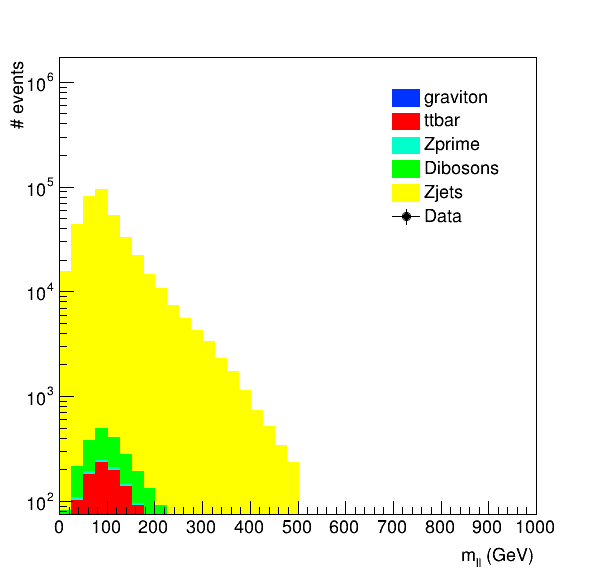

In [39]:
stack_mll->Draw("hist");
stack_mll->SetMaximum(1E6);     //set maximum range on axis
stack_mll->GetXaxis()->SetLimits(0, 1000);
stack_mll->GetYaxis()->SetTitle("# events");
stack_mll->GetYaxis()->SetTitleOffset(1.3);
stack_mll->GetXaxis()->SetTitle("m_{ll} (GeV)");
stack_mll->GetXaxis()->SetTitleOffset(1.3);
hist_mll_d->Draw("same E");
leg->Draw();
C->Draw();

/*
If there are less statistics, then it is more likely that the MC samples and real data will differ as 
MC predicts the amount of events one can expect at a certain range of e.g. m_ll. As long as the number of 
events of MC and real data do not differ too much at high statistics, e.g. 10^6 events,
then MC is correct. If they do, then there is something wrong with the theory modelling the MC.
*/

In [34]:
hist_met_d->SetLineColor(kBlack);
hist_met_d->SetMarkerStyle(kFullCircle);
hist_met_d->SetMarkerColor(kBlack);

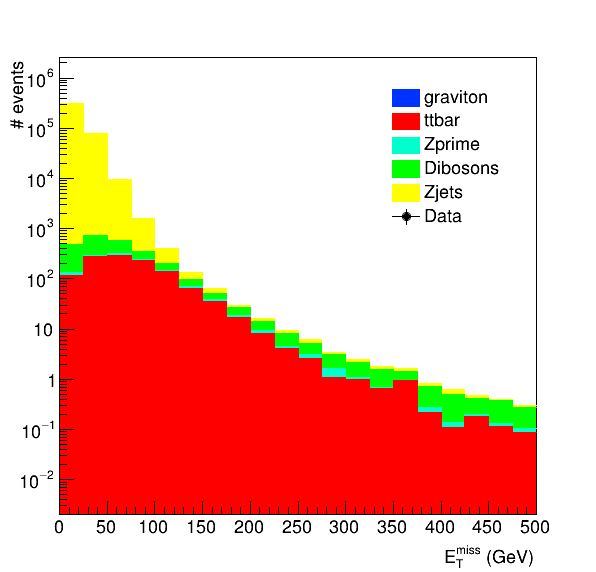

In [35]:
stack_met->Draw("hist"); 
stack_met->SetMaximum(1E6);
stack_met->SetMinimum(1E-2); 
stack_met->GetYaxis()->SetTitle("# events");
stack_met->GetYaxis()->SetTitleOffset(1.3); 
stack_met->GetXaxis()->SetTitle("E_{T}^{miss} (GeV)");
stack_met->GetXaxis()->SetTitleOffset(1.3);
hist_met_d->Draw("same e");
leg->Draw();
C->Draw();

/*
Often more difficult to model E_miss
*/

In [36]:
hist_lep_pt_d->SetLineColor(kBlack); 
hist_lep_pt_d->SetMarkerStyle(kFullCircle); 
hist_lep_pt_d->SetMarkerColor(kBlack);

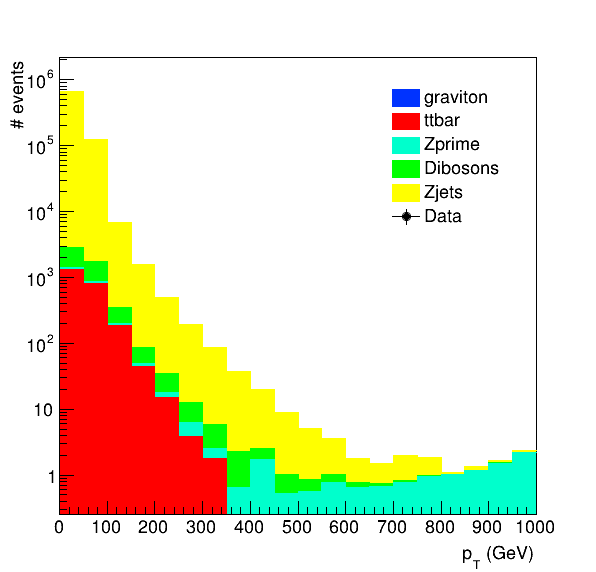

In [37]:
stack_lep_pt->Draw("hist"); 
stack_lep_pt->SetMaximum(1E6); 
stack_lep_pt->GetYaxis()->SetTitle("# events");
stack_lep_pt->GetYaxis()->SetTitleOffset(1.3); 
stack_lep_pt->GetXaxis()->SetTitle("p_{T} (GeV)");
stack_lep_pt->GetXaxis()->SetTitleOffset(1.3);
hist_lep_pt_d->Draw("same e"); 
leg->Draw();
C->Draw();

/*
natural to also include ratio of events between data/MC --> Add another pad to the canvas including this!
*/

In [38]:
//cout << "Dibosons H_met: " << H_met.GetEntries() << " entries"<< endl;